In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from insightface.app import FaceAnalysis

In [ ]:
app = FaceAnalysis(name="buffalo_s",providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0,det_size=(640,640))

In [3]:
input_image = cv2.imread("input/Parstech-ai.jpg")
input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)


In [4]:
face_bank = np.load("face_bank.npy",allow_pickle=True)

/home/mohammad/.local/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


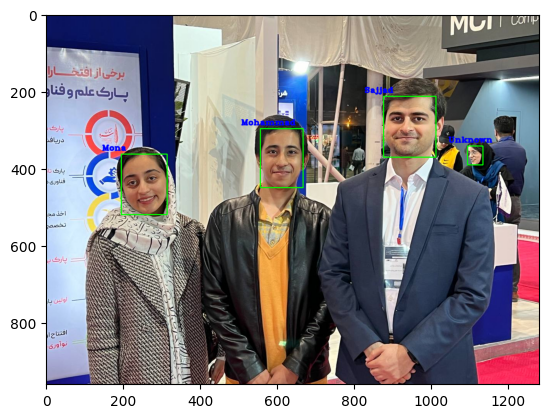

In [5]:
results = app.get(input_image)
for result in results:
    cv2.rectangle(input_image,(int(result.bbox[0]),int(result.bbox[1])),(int(result.bbox[2]),int(result.bbox[3])),(0,255,0),2)

    for person in face_bank:
        face_bank_person_embedding = person["embedding"]
        new_person_embedding = result["embedding"]

        distance = np.sqrt(np.sum((face_bank_person_embedding - new_person_embedding) **2))
        if distance < 25:
            cv2.putText(input_image,person["name"],
            (int(result.bbox[0])-50 , int(result.bbox[1])-10),
            cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),2,cv2.LINE_AA)
            break
    else:
         cv2.putText(input_image,"Unknown",
            (int(result.bbox[0])-50 , int(result.bbox[1])-10),
            cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),2,cv2.LINE_AA)


plt.imshow(input_image)
